In [ ]:
# ---------------------------------
# Step 1: Import Required Libraries
# ---------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import calibration_curve
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# ---------------------------------
# Step 2: Set a Fresh Visualization Style
# ---------------------------------
plt.style.use("seaborn-v0_8-talk")
sns.set_theme(style="whitegrid", palette="bright")


In [ ]:
# ---------------------------------
# Step 3: Load the Heart Disease Dataset from OpenML
# ---------------------------------
# Dataset "heart" from OpenML (if not available, try: name="heart-disease", version=?)
heart = fetch_openml(name="heart-disease", version=1, as_frame=True)
df = heart.frame
print("Dataset shape:", df.shape)
print("First 5 rows:\n")
df.head()

Dataset shape: (303, 14)
First 5 rows:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
# ---------------------------------
# Step 4: Preprocess the Data
# ---------------------------------
# Check for missing values and drop if necessary
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
# Assume the target column is named 'target' (0: no heart disease, 1: heart disease)
# Convert target to numeric if necessary
df['target'] = pd.to_numeric(df['target'], errors='coerce')

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: []
Numerical columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
# Convert categorical columns to string (if not already) to prepare for one-hot encoding
X[categorical_cols] = X[categorical_cols].astype(str)

# One-hot encode categorical features (drop_first to avoid multicollinearity)
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])


In [ ]:
# ---------------------------------
# Step 5: Split Data into Training and Testing Sets
# ---------------------------------
# Using a 70/30 split with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (212, 13)
Testing set shape: (91, 13)


In [ ]:
# ---------------------------------
# Step 6: Train the Random Forest Classifier
# ---------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# ---------------------------------
# Step 7: Evaluate the Model
# ---------------------------------
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76        41
         1.0       0.79      0.84      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



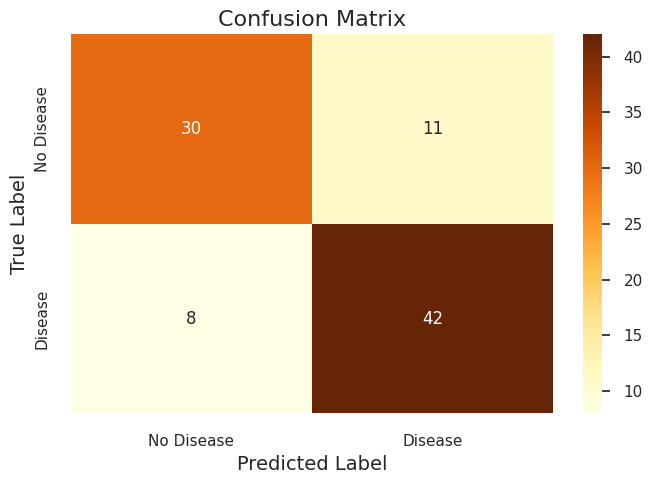

In [ ]:
# ---------------------------------
# Step 8: Visualization - Confusion Matrix (New Style)
# ---------------------------------
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-18-4a13e4854a83>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df['target'] = pairplot_df['target'].astype(str)


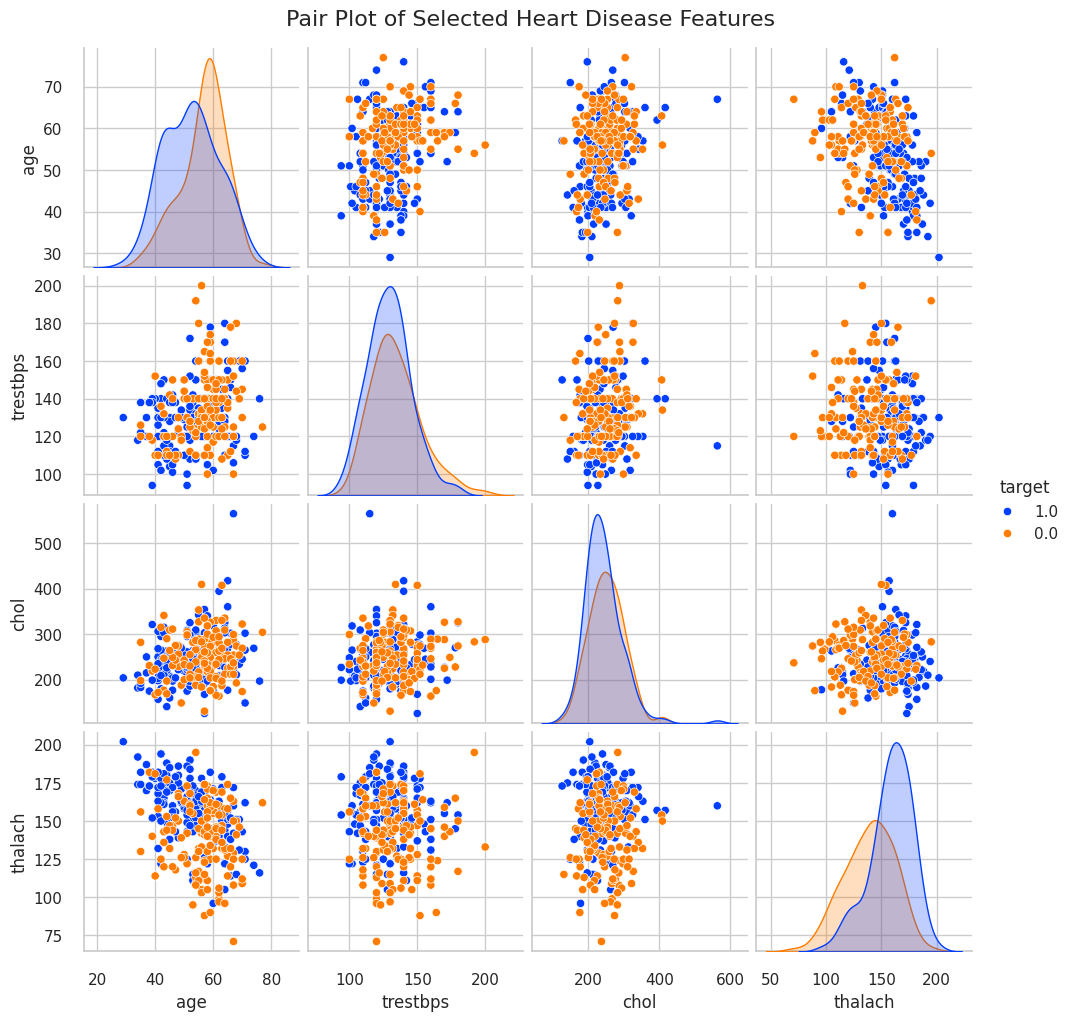

In [ ]:
# ---------------------------------
# Step 9: Visualization - Pair Plot of Selected Features
# ---------------------------------
# Select a subset of features for clarity (e.g., age, trestbps, chol, thalach)
selected_features = ['age', 'trestbps', 'chol', 'thalach']
# Combine these with the target for plotting
pairplot_df = df[selected_features + ['target']]
# Convert target to string for better legend display
pairplot_df['target'] = pairplot_df['target'].astype(str)
sns.pairplot(pairplot_df, hue="target", palette="bright", diag_kind="kde")
plt.suptitle("Pair Plot of Selected Heart Disease Features", fontsize=16, y=1.02)
plt.show()

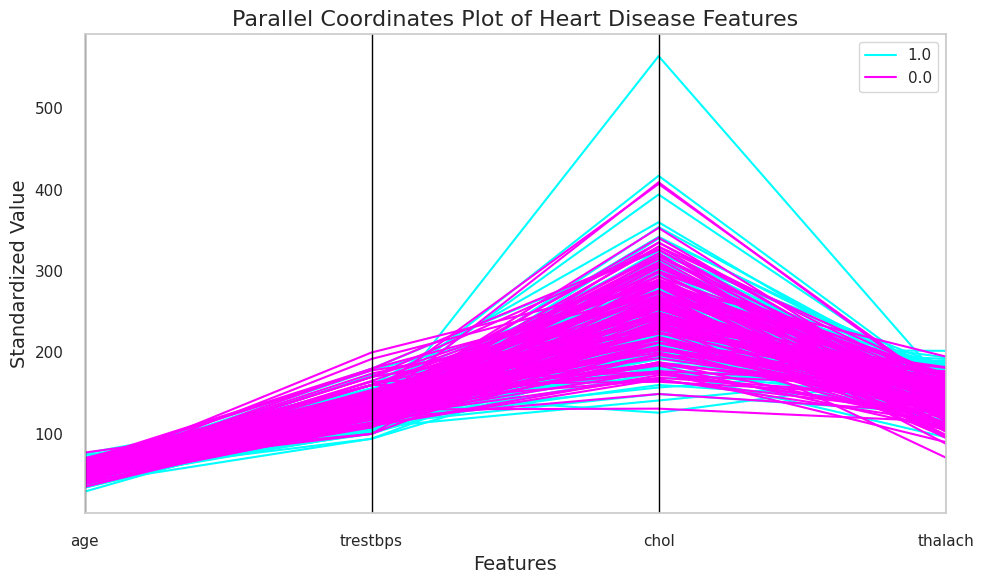

In [ ]:
# ---------------------------------
# Step 10: Visualization - Parallel Coordinates Plot
# ---------------------------------
from pandas.plotting import parallel_coordinates
# For parallel coordinates, select a small subset of features to avoid clutter
parallel_df = df[['age', 'trestbps', 'chol', 'thalach', 'target']].copy()
parallel_df['target'] = parallel_df['target'].astype(str)
plt.figure(figsize=(10,6))
parallel_coordinates(parallel_df, 'target', colormap='cool')
plt.title("Parallel Coordinates Plot of Heart Disease Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Standardized Value", fontsize=14)
plt.tight_layout()
plt.show()

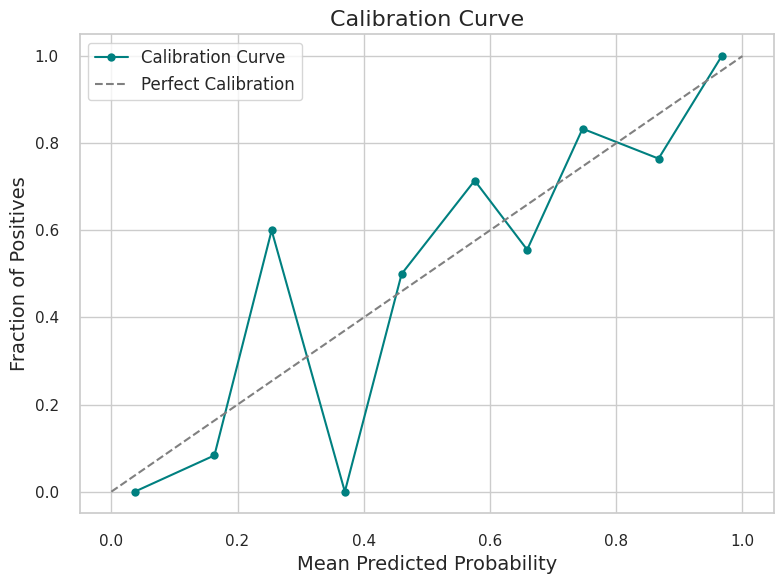

In [ ]:
# ---------------------------------
# Step 11: Visualization - Calibration Curve (Reliability Diagram)
# ---------------------------------
from sklearn.calibration import calibration_curve

y_prob = rf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(8,6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='teal', label="Calibration Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfect Calibration")
plt.xlabel("Mean Predicted Probability", fontsize=14)
plt.ylabel("Fraction of Positives", fontsize=14)
plt.title("Calibration Curve", fontsize=16)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.show()


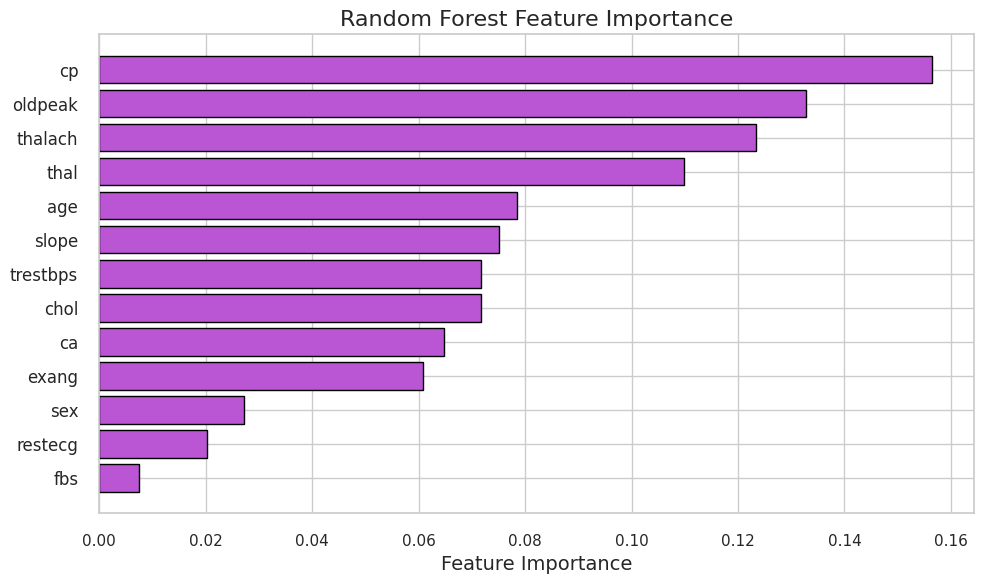

In [ ]:
# ---------------------------------
# Step 12: Visualization - Feature Importance Bar Chart
# ---------------------------------
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], color='mediumorchid', edgecolor='black')
plt.yticks(range(len(sorted_idx)), [X_encoded.columns[i] for i in sorted_idx], fontsize=12)
plt.xlabel("Feature Importance", fontsize=14)
plt.title("Random Forest Feature Importance", fontsize=16)
plt.tight_layout()
plt.show()

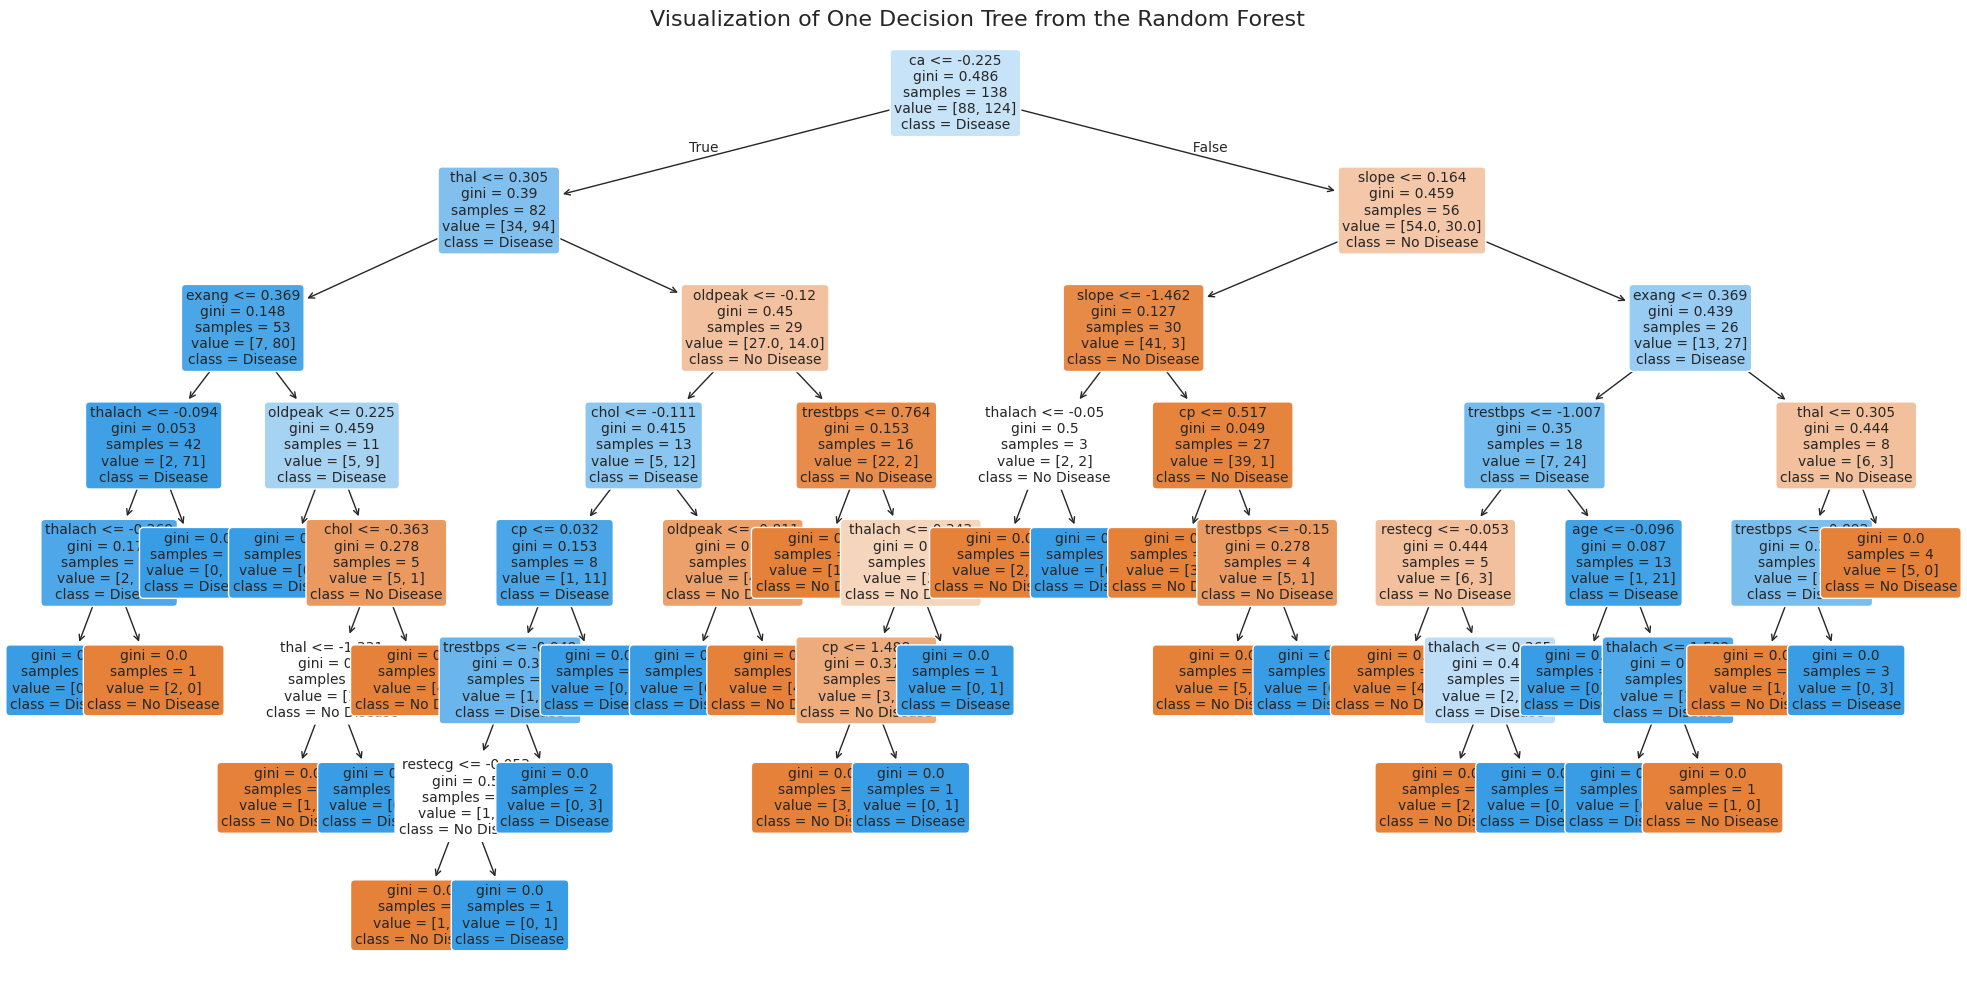

In [ ]:
# ---------------------------------
# Step 13: Visualization - Decision Tree Plot from Random Forest
# ---------------------------------
from sklearn import tree
# Extract one tree from the forest for visualization
estimator = rf.estimators_[0]
plt.figure(figsize=(20,10))
tree.plot_tree(estimator,
               feature_names=X_encoded.columns,
               class_names=["No Disease", "Disease"],
               filled=True, rounded=True, fontsize=10)
plt.title("Visualization of One Decision Tree from the Random Forest", fontsize=16)
plt.tight_layout()
plt.show()